In [72]:
import tensorflow as tf

input_dir = "C:\\Users\\USUARIO\\Documents\\Septimo semestre\\Intro ia\\proyecto clasificacion\\tom_and_jerry\\tom_and_jerry"

# Parámetros de la carga de datos
batch_size = 32
image_size = (180, 180)
validation_split = 0.2

# Cargar datos de imágenes desde el directorio
train_dataset = tf.keras.utils.image_dataset_from_directory(
    input_dir,
    validation_split=validation_split,
    subset="training",
    seed=42,
    image_size=image_size,
    batch_size=batch_size
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    input_dir,
    validation_split=validation_split,
    subset="validation",
    seed=42,
    image_size=image_size,
    batch_size=batch_size
)

# Ver las clases asignadas a cada índice
class_names = train_dataset.class_names
print(class_names)

Found 3170 files belonging to 2 classes.
Using 2536 files for training.
Found 3170 files belonging to 2 classes.
Using 634 files for validation.
['jerry', 'tom']


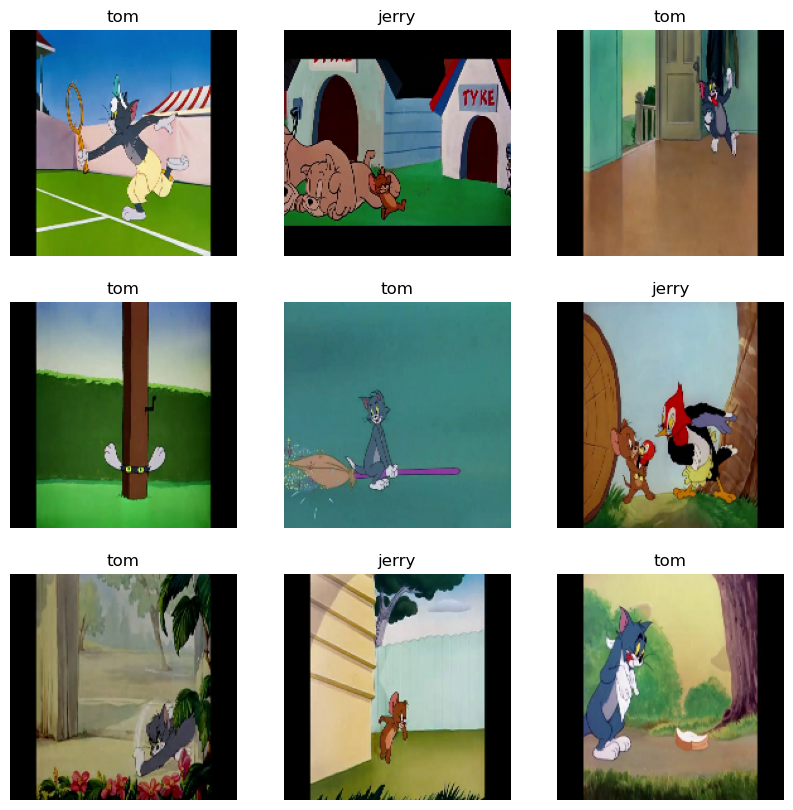

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [74]:
# Optimizar la carga de datos
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [75]:
# Normalizar los datos de entrenamiento
normalized_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9469187


In [76]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(image_size[0],
                                  image_size[1],
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

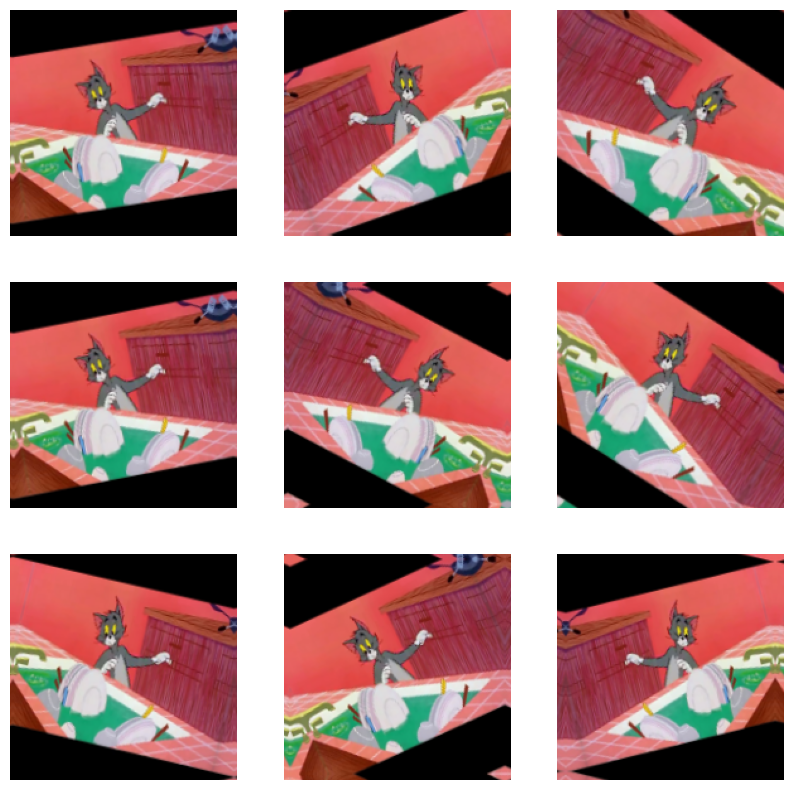

In [77]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [99]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
num_classes = len(class_names)
from tensorflow.keras import regularizers

model = Sequential([
    layers.Rescaling(1./255, input_shape=(image_size[0], image_size[1], 3)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [100]:
model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [101]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_10 (Rescaling)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │      15,859,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,953,730 (60.86 MB)

 Trainable params: 15,953,730 (60.86 MB)

 Non-trainable params: 0 (0.00 B)

In [102]:
epochs=30
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs)

Epoch 1/30


C:\Users\USUARIO\anaconda3\lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 290ms/step - accuracy: 0.5771 - loss: 2.2472 - val_accuracy: 0.7445 - val_loss: 0.6439
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 296ms/step - accuracy: 0.7482 - loss: 0.6189 - val_accuracy: 0.8644 - val_loss: 0.5055
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 22s 277ms/step - accuracy: 0.8416 - loss: 0.5252 - val_accuracy: 0.8265 - val_loss: 0.5265
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 22s 274ms/step - accuracy: 0.8685 - loss: 0.4411 - val_accuracy: 0.8975 - val_loss: 0.4754
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 296ms/step - accuracy: 0.8953 - loss: 0.4491 - val_accuracy: 0.8959 - val_loss: 0.3986
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 290ms/step - accuracy: 0.9164 - loss: 0.3472 - val_accuracy: 0.8107 - val_loss: 0.6004
Epoch 7/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 286ms/step - accuracy: 0.9062 - loss: 0.3859 - val_accuracy: 0.9227 - val_loss: 0.3542
Epoch 8/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 285ms/step - accuracy: 0.9421 - loss: 0.3061 - val_accuracy: 0.892

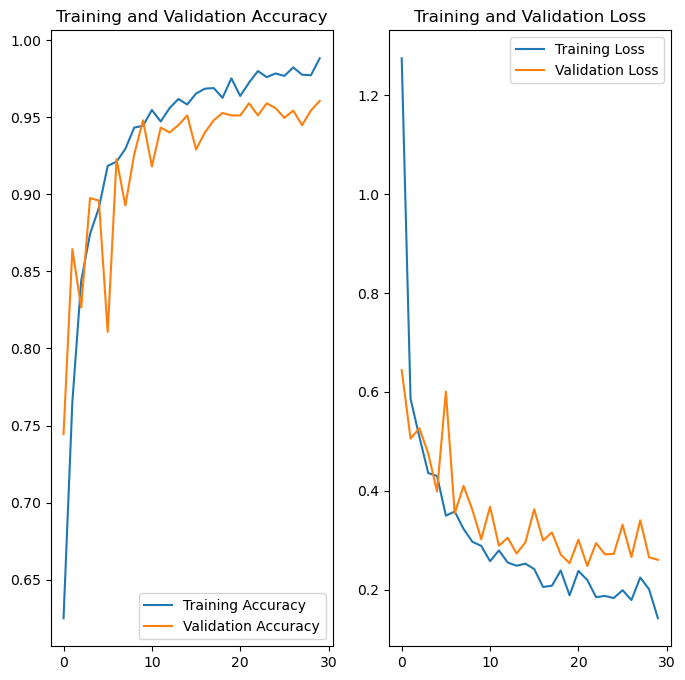

In [103]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


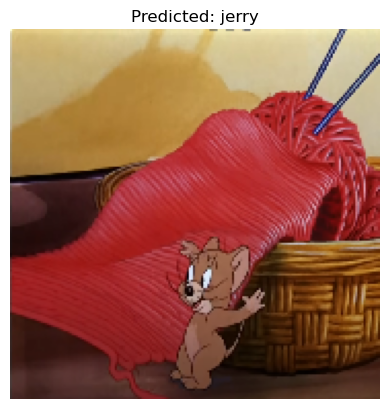

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


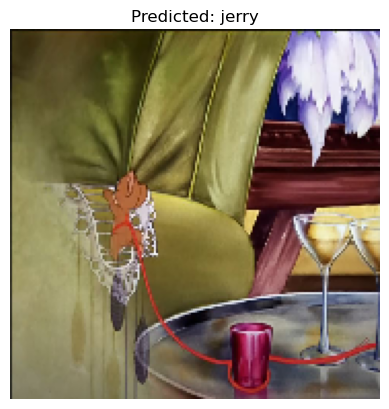

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


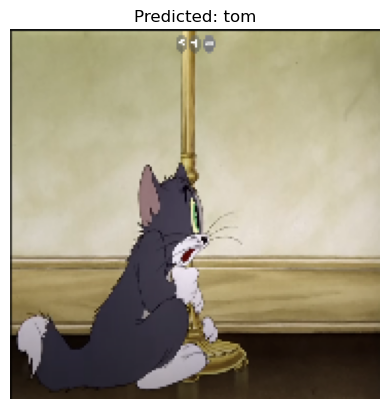

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


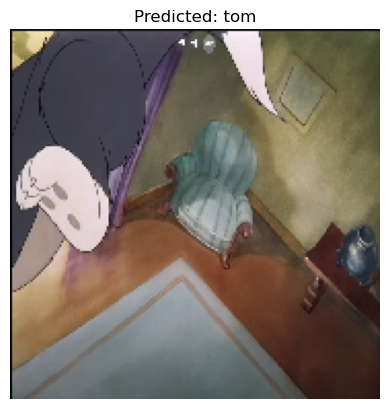

In [110]:
new_image_paths = [
    "C:\\Users\\USUARIO\\Documents\\Septimo semestre\\Intro ia\\proyecto clasificacion\\FotosPrueba\\jerry4.png",
    "C:\\Users\\USUARIO\\Documents\\Septimo semestre\\Intro ia\\proyecto clasificacion\\FotosPrueba\\jerry5.jpg",
    "C:\\Users\\USUARIO\\Documents\\Septimo semestre\\Intro ia\\proyecto clasificacion\\FotosPrueba\\tom5.png",
    "C:\\Users\\USUARIO\\Documents\\Septimo semestre\\Intro ia\\proyecto clasificacion\\FotosPrueba\\tom6.png",
]



# Cargar las imágenes y preprocesarlas
for image_path in new_image_paths:
    img_array = load_and_preprocess_image(image_path, image_size)
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]
    
    # Mostrar la imagen y la predicción
    img = image.load_img(image_path, target_size=image_size)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()


In [111]:
import pickle

# Guardar el modelo en un archivo pickle
with open('modelo_clasificacion.pkl', 'wb') as f:
    pickle.dump(model, f)
